Data for this research project comes from a few sources:

- Zillow: https://www.zillow.com/research/data/
- Census.gov

Download all of the data here: https://cl.ly/3v1Y1Y0Q1L2t

1. price-to-rent-ratio.csv
1. rental-1-room.csv
1. rental-2-rooms.csv
1. rental-condo.csv
1. rental-median.csv
1. sales-median-listing.csv
1. sales-median-sold.csv
1. tx-vs-usa-economic-indicators.csv
1. usa-key-economic-indicators.csv

Interesting analysis done by The Economist: http://www.economist.com/blogs/graphicdetail/2016/08/daily-chart-20

In [5]:
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# This ratio is first calculated at the individual home level,
# where the estimated home value is divided by 12 times its estimated monthly rent price.
# The median of all home-level price-to-rent ratios for a given region is then calculated.

# Carl note: Example for a $100k home with $1,000 monthly rent: 100000/(12*1000) = 8.3
# If you could rent this same home for $1,200 instead, you'd get a ratio of 6.9
# Takeaway: A lower ratio is better!

# Let's load our data
price_to_rent = pd.read_csv('./data/price-to-rent-ratio.csv')

In [3]:
price_to_rent.head(1)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-10,2010-11,2010-12,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
0,274772,Northeast Dallas,Dallas,TX,Dallas-Fort Worth,Dallas,1,10.0,9.91,9.73,...,11.72,11.77,12.14,12.17,12.21,12.34,12.54,12.61,12.57,12.64


In [4]:
# Drop the unecessary columns
price_to_rent_values = price_to_rent.drop(price_to_rent.columns[[0, 1, 2, 4, 5, 6]], axis=1)

# Calculate the average price-to-rent by state
avg_ptr_by_state = price_to_rent_values.groupby(['State']).mean()
avg_ptr_by_state.head(3)

,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
State,,,,,,,,,,,,,,,,,,,,,
AK,NaN,NaN,NaN,13.045000,12.548929,12.044643,11.950000,11.908571,11.908571,11.736071,...,11.991786,12.007500,12.053929,12.073214,12.110714,12.172500,12.334286,12.477857,12.582143,12.604643
AL,9.182391,9.130652,9.027609,8.956413,8.892717,8.906413,8.817174,8.756304,8.685109,8.675217,...,8.632935,8.674130,8.683804,8.672609,8.711848,8.771630,8.863043,8.939130,8.994674,8.988478
AR,10.559231,10.493846,10.404615,10.451154,10.433462,10.161154,9.909615,9.592692,9.629615,9.581923,...,9.085385,9.107692,9.143462,9.075385,9.156538,9.188077,9.198846,9.239615,9.310385,9.358846


In [5]:
# Look at the price-to-rent ratio for the last month of data, nationwide
avg_ptr_by_state['2017-02'].copy().sort_values()

State
MS     6.229259
MI     6.820800
OH     8.356572
MD     8.487143
IN     8.614087
AL     8.988478
SC     9.056500
AR     9.358846
MO     9.411308
WI     9.565541
KS     9.714211
VT     9.810000
NE     9.983600
GA    10.001892
TX    10.021692
PA    10.123959
KY    10.538571
RI    10.629545
FL    10.638245
NH    10.690000
IL    11.236467
CT    11.286379
NC    11.449242
TN    11.492022
LA    11.579541
NJ    11.820769
MN    12.053483
AK    12.604643
NM    13.542542
ID    13.664348
AZ    14.013391
UT    14.103889
NV    14.465263
DE    14.470000
VA    14.793118
MT    15.363500
MA    15.669467
CO    15.779107
DC    16.827079
NY    16.924207
OR    17.111776
WA    17.558258
CA    18.832180
HI    24.592222
Name: 2017-02, dtype: float64

In [6]:
# Compare the price-to-rent change from one year ago
# States with a higher percent change means they are now LESS attractive to buy from
ptr_change = (avg_ptr_by_state['2017-02'] - avg_ptr_by_state['2016-02']) / avg_ptr_by_state['2016-02'] * 100
ptr_change.sort_values()

State
MT    -4.556750
MS    -3.638135
KY     0.589739
GA     0.765126
CT     1.483629
SC     1.627111
RI     2.529814
ID     2.541682
CA     2.720984
IN     2.822208
UT     3.367264
AZ     3.456046
VA     3.481060
DE     3.653295
TX     3.759099
WA     3.843857
NH     4.038929
MN     4.429258
NC     4.526026
AR     5.105611
IL     5.163785
NV     5.196545
WI     5.269811
NE     5.414537
AK     5.677157
AL     5.764385
MA     5.780430
NJ     6.082955
DC     6.148732
PA     6.172577
MI     6.291556
NY     6.318674
TN     6.861209
MD     6.969978
HI     7.166029
LA     7.194300
MO     7.262231
FL     7.330639
OH     7.599596
OR     8.354718
KS     8.830929
NM     9.585528
CO    10.809263
VT    11.224490
dtype: float64

## Reader notes
Though Vermont has had the fastest growing price-to-rent (ptr), the state remains relatively attractive with a ptr ratio of 9.81%.

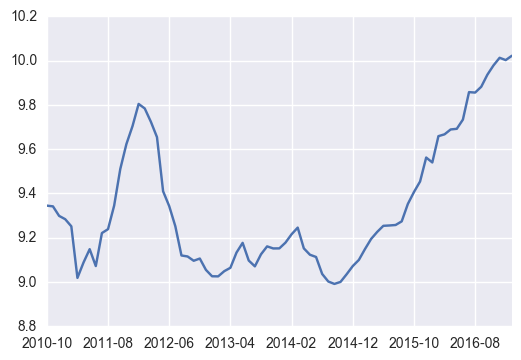

In [7]:
# Plot the price-to-rent in Texas
avg_ptr_by_state.loc["TX"].plot()

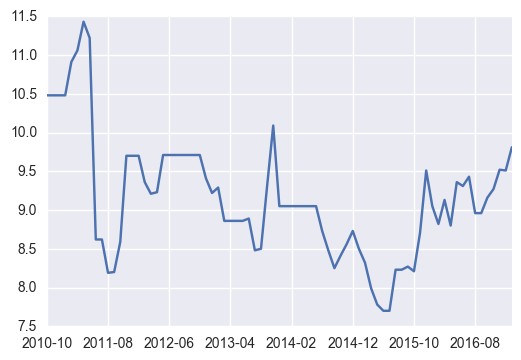

In [8]:
# Plot the price-to-rent in Vermont
# Note: The data has many NaN so we need to patch those
avg_ptr_by_state.loc["VT"].fillna(method="backfill").plot()

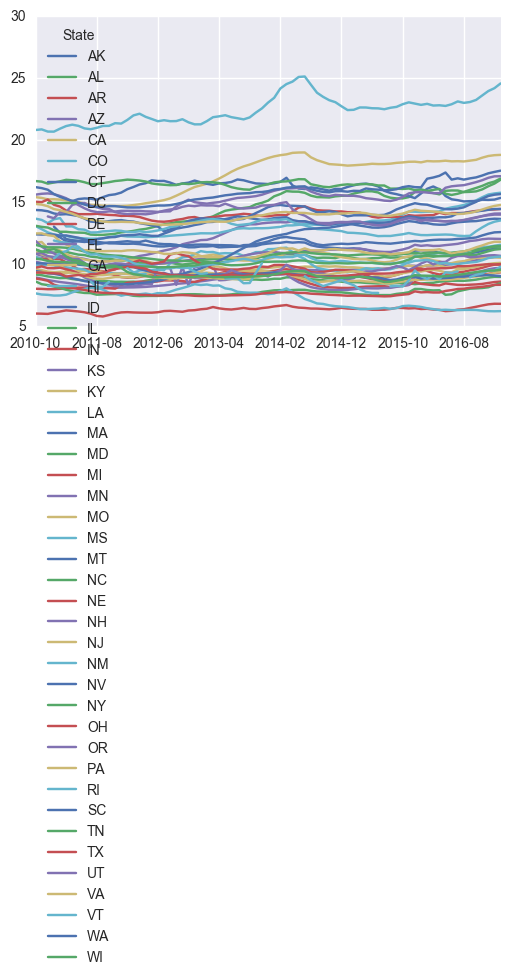

In [9]:
# Just for kicks, let's graph all the states
# Transpose the data so we can graph these over time
avg_ptr_by_state.T.plot()

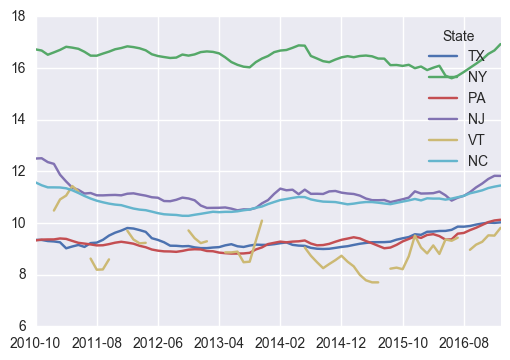

In [10]:
# Select specific states Carl is interested in and see how they compare
avg_ptr_by_state.loc[["TX", "NY", "PA", "NJ", "VT", "NC"]].T.plot()

## Reader notes
What led me to create this analysis is the desire to buy a property in Midtown Houston. Let's see if this would be a good idea based on the data available.

In [11]:
# Let's analyze Houston only
houston_ptr = price_to_rent[price_to_rent["City"] == "Houston"]

# Drop the current index and replace it with the regionname, this will allow us to plot these
houston_ptr = houston_ptr.set_index(houston_ptr["RegionName"])

# Remove unecessary columns
houston_ptr = houston_ptr.drop(houston_ptr.columns[[0, 1, 2, 3, 4, 5, 6]], axis=1)
houston_ptr.head(1)

,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
RegionName,,,,,,,,,,,,,,,,,,,,,
South Belt - Ellington,7.42,7.5,7.53,7.42,7.35,7.3,7.35,7.57,7.42,7.73,...,8.25,8.28,8.46,8.46,8.51,8.56,8.53,8.66,8.43,8.41


In [12]:
# Fill empty rows
houston_ptr = houston_ptr.fillna(0)
houston_ptr.head(1)

,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
RegionName,,,,,,,,,,,,,,,,,,,,,
South Belt - Ellington,7.42,7.5,7.53,7.42,7.35,7.3,7.35,7.57,7.42,7.73,...,8.25,8.28,8.46,8.46,8.51,8.56,8.53,8.66,8.43,8.41


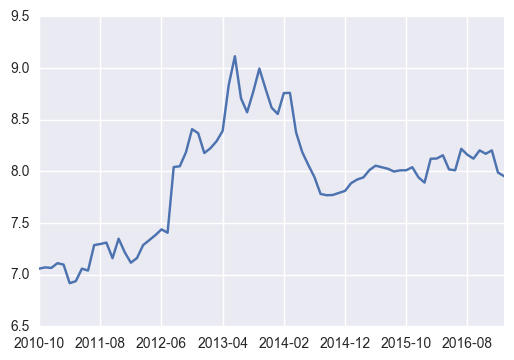

In [13]:
# Plot the mean for Houston
houston_ptr.mean().plot()

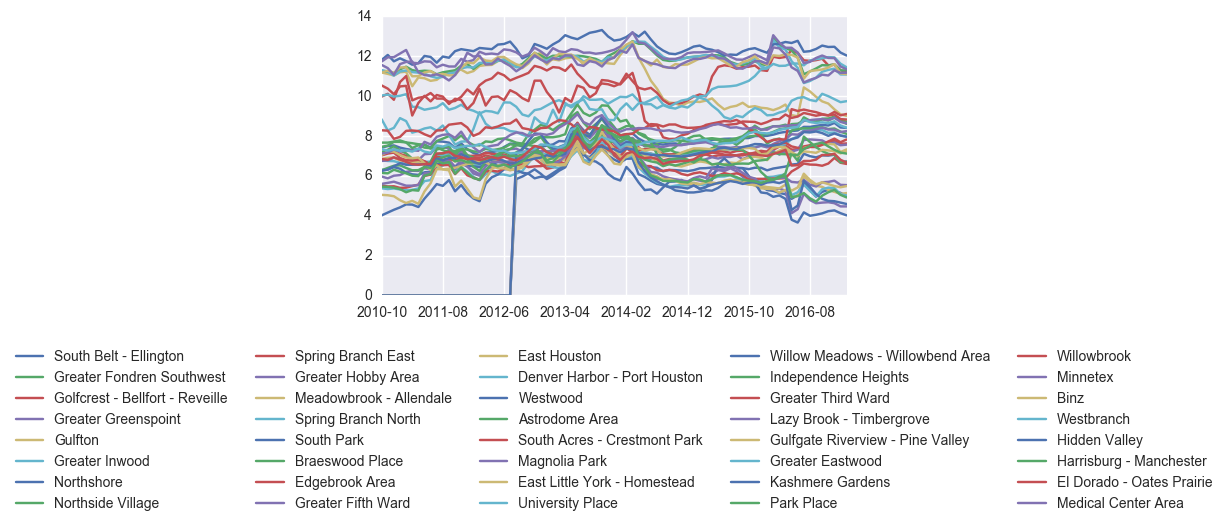

In [14]:
# Plot all houston hoods
ptr_houston = houston_ptr.T.plot()

# Use stack overflow answer to position plot labels below the graph
box = ptr_houston.get_position()
ptr_houston.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ptr_houston.legend(loc='upper center', bbox_to_anchor=(0.5, -.15), ncol=5)

In [15]:
# List all the regions we have. This will allow us to focus our apartment research on Zillow.com
houston_ptr.index

Index(['South Belt - Ellington', 'Greater Fondren Southwest',
       'Golfcrest - Bellfort - Reveille', 'Greater Greenspoint', 'Gulfton',
       'Greater Inwood', 'Northshore', 'Northside Village',
       'Spring Branch East', 'Greater Hobby Area', 'Meadowbrook - Allendale',
       'Spring Branch North', 'South Park', 'Braeswood Place',
       'Edgebrook Area', 'Greater Fifth Ward', 'East Houston',
       'Denver Harbor - Port Houston', 'Westwood', 'Astrodome Area',
       'South Acres - Crestmont Park', 'Magnolia Park',
       'East Little York - Homestead', 'University Place',
       'Willow Meadows - Willowbend Area', 'Independence Heights',
       'Greater Third Ward', 'Lazy Brook - Timbergrove',
       'Gulfgate Riverview - Pine Valley', 'Greater Eastwood',
       'Kashmere Gardens', 'Park Place', 'Willowbrook', 'Minnetex', 'Binz',
       'Westbranch', 'Hidden Valley', 'Harrisburg - Manchester',
       'El Dorado - Oates Prairie', 'Medical Center Area'],
      dtype='object', name

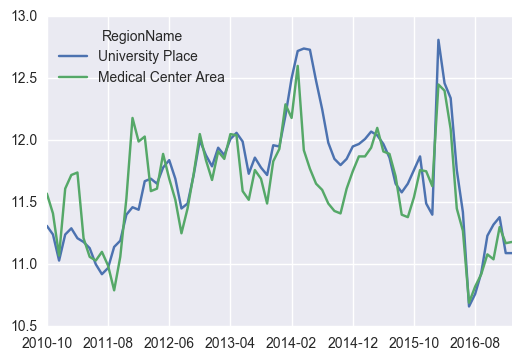

In [16]:
# Here are two areas of Houston Carl likes. Let's compare the two.
houston_ptr.loc[["University Place", "Medical Center Area"]].T.plot()

## Reader notes

Houston has a competitive price-to-rent ratio. The ratio peeked in 2013, which was unexpected. Carl is curious to understand why this happened. Is it due to less demand on the rental side? (Aka: Rent prices decreasing) Is it due to oversupply? (Aka: Pressure on price due to high supply, low demand.)

It's also interesting to note that the ptr varies quite a bit across the different Houston hoods.

In [17]:
# Import rental data for 1bd apartments
rental_1_room = pd.read_csv("./data/rental-1-room.csv")
rental_1_room.head(2)

,RegionName,City,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
0,Northeast Dallas,Dallas,TX,Dallas-Fort Worth,Dallas,1,NaN,NaN,NaN,NaN,...,769.5,806.5,829.0,820.0,835.0,850.0,820.0,899.5,855.0,895.0
1,Paradise,Las Vegas,NV,Las Vegas,Clark,2,NaN,NaN,NaN,NaN,...,815.0,857.0,764.5,870.0,870.0,755.0,802.5,840.0,855.0,920.0


In [18]:
# Reset index
rental_1_room = rental_1_room[rental_1_room["City"] == "Houston"].set_index("RegionName")

# Drop unecessary colums
rental_1_room = rental_1_room.drop(rental_1_room.columns[[0,1,2,3,4]], axis=1)
rental_1_room = rental_1_room.fillna(method='pad') # take the value from before

(800, 2000)

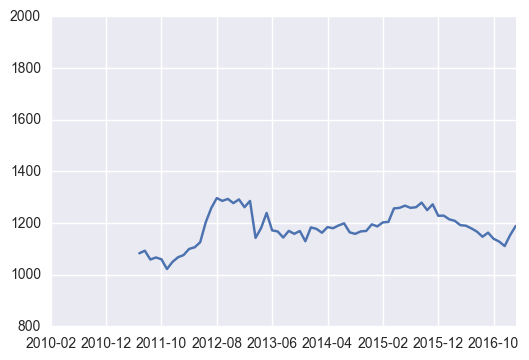

In [19]:
# Plot the mean over time
plot = rental_1_room.mean().plot()
plot.set_ylim(800, 2000)

(800, 2000)

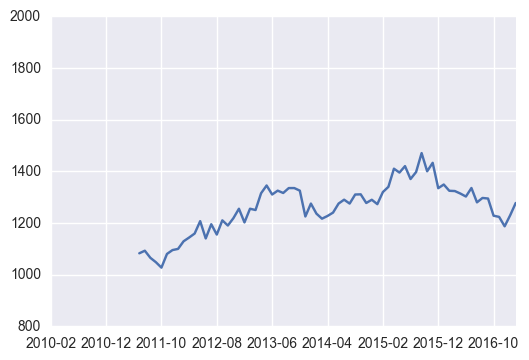

In [20]:
# Rental prices are not normally distributed we need to look at the median
plot = rental_1_room.median().plot()
plot.set_ylim(800, 2000)

(800, 2000)

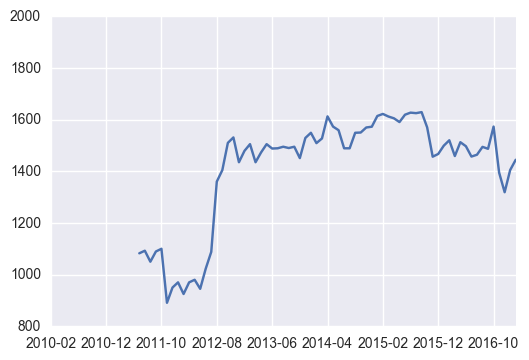

In [21]:
# Analyze midtown specifically, which is where Carl wants to buy
plot = rental_1_room.loc["Midtown"].plot()
plot.set_ylim(800, 2000)

## Reader notes

A decreasing mean rental price is very unexpected. Earlier we saw that the mean rent in Houston is growing. Could this be because midtown is expensive and already at peek?

Let's compare this to two neighborhoods we know pretty well in New York: West Village and Bushwick.

In [22]:
# Let's re-do this but for NYC
rental_1_room = pd.read_csv("./data/rental-1-room.csv")
rental_1_room = rental_1_room[rental_1_room["City"] == "New York"].set_index("RegionName")
rental_1_room = rental_1_room.drop(rental_1_room.columns[[0,1,2,3,4]], axis=1)
rental_1_room = rental_1_room.fillna(0)

(1000, 4500)

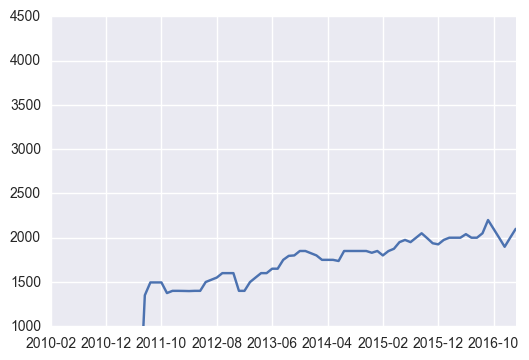

In [23]:
bushwick = rental_1_room.loc['Bushwick'].plot()
bushwick.set_ylim(1000, 4500)

(1000, 4500)

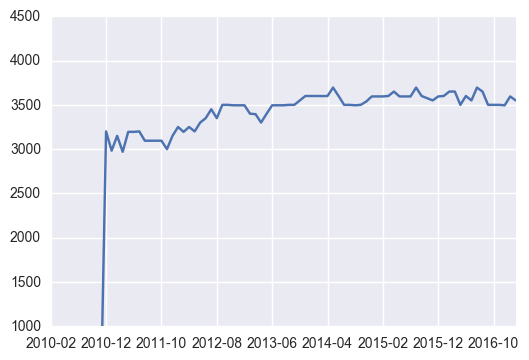

In [24]:
west_village = rental_1_room.loc["West Village"].plot()
west_village.set_ylim(1000, 4500)

## Reader notes
It's **really** interesting to note what's happening:
- Rent in Bushwick (an up and coming area) has grown much faster than in a more established area (such a the West Village)
- Rent in the West Village (even though it's absurdly high) has continued to increase slowly. We did **not** see the same pattern in Midtown Houston, where rent actually went down.

Not sure what is happening here but I'm not convinced that downtown Houston is the right place to buy...

In [25]:
# Let's check a two bedroom apt
rental_2_room = pd.read_csv('./data/rental-2-rooms.csv')
rental_2_room = rental_2_room[rental_2_room["City"] == "Houston"].set_index("RegionName")
rental_2_room = rental_2_room.drop(rental_2_room.columns[[0,1,2,3,4]], axis=1)
rental_2_room = rental_2_room.fillna(method='pad')

(1200, 2000)

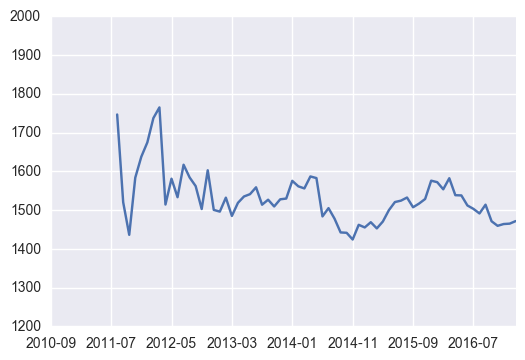

In [26]:
plot = rental_2_room.mean().plot()
plot.set_ylim(1200, 2000)

(1200, 2000)

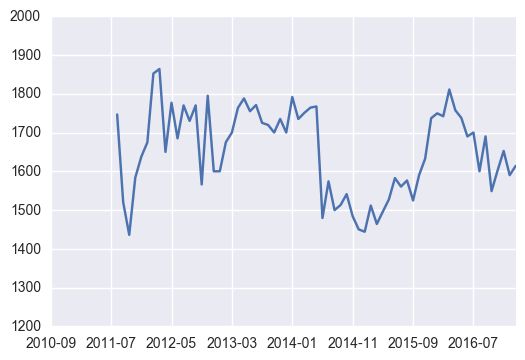

In [27]:
plot = rental_2_room.median().plot()
plot.set_ylim(1200, 2000)

In [28]:
# Let's now compare 1 br with 2 br in houton

rental_1_room = pd.read_csv('./data/rental-1-room.csv')
rental_1_room = rental_1_room[rental_1_room["City"] == "Houston"].set_index("RegionName")
rental_1_room = rental_1_room.drop(rental_1_room.columns[[0,1,2,3,4]], axis=1)
rental_1_room = rental_1_room.fillna(method='pad')

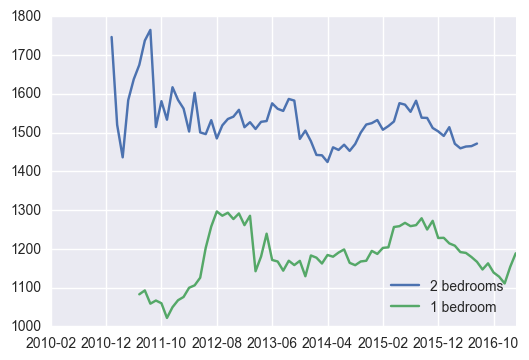

In [29]:
plot = rental_2_room.mean().plot()
rental_1_room.mean().plot(ax=plot)
plot.legend(["2 bedrooms", "1 bedroom"], loc="lower right")

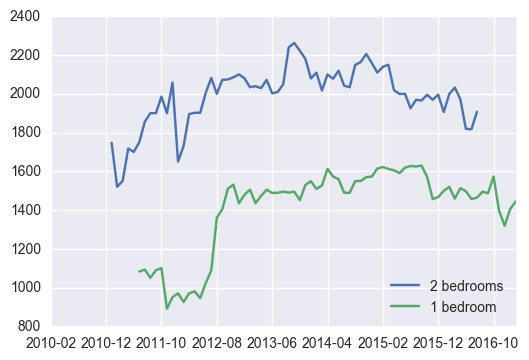

In [30]:
# Let's now do this just for midtown in houston

plot = rental_2_room.loc["Midtown"].plot()
rental_1_room.loc["Midtown"].plot(ax=plot)
plot.legend(["2 bedrooms", "1 bedroom"], loc="lower right")

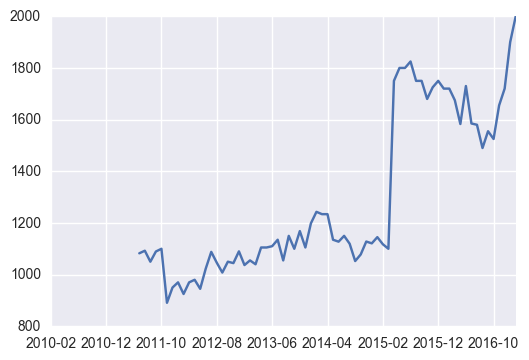

In [31]:
# Let's do downtown
# We only have data for 1 bedroom downtown
rental_1_room.loc["Downtown"].plot()

In [32]:
# Let's look at the rental listing mediam

rental_median = pd.read_csv("./data/rental-median.csv")
rental_median = rental_median.fillna(method='pad')
tx_median = rental_median[rental_median["City"] == "Houston"].set_index("RegionName")
tx_median = tx_median.drop(["State", "City", "Metro", "CountyName", "SizeRank"], axis=1)
tx_median.head(1)

,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
RegionName,,,,,,,,,,,,,,,,,,,,,
Alief,2500.0,1197.5,1150.0,1195.0,1050.0,1100.0,1200.0,1095.0,1050.0,925.0,...,845.0,850.0,847.5,875.0,800.0,852.5,837.5,865.0,925.0,1037.5


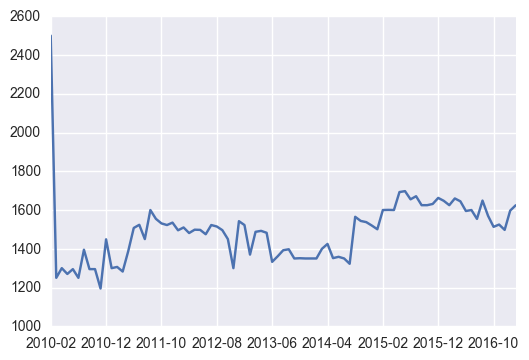

In [33]:
# Median renting price in houston
tx_median.median().plot()

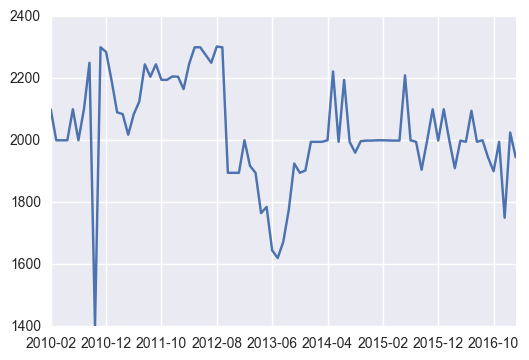

In [34]:
# Midtown for all apartment types
tx_median.loc["Midtown"].plot()

## Questions for realtor:

- Why hasn't midtown average rent price increased in the last 10 years?
  - Is it because it's already really expensive and new development is leading people to move in new neighborhoods?
- What areas are you expecting will grow the fastest in the next 5 years for rentals?


## Questions to answer with code:
- What are the fastest growing areas—in terms of rental price—in Houston?


## Session notes
- Research local newspapers at that time when we see a dip
- Can we get occupancy numbers?
- Looking at this at a state level doesn't allow you to make a decision. At the neighborhood level makes sense.
  - Superimpose individual hoods with median for the whole city. See if the rent is growing faster in that hood v.s. median?
    - How to do this = tbd. But we can do this.
- What metrics do rental investors look at to determine if something is a good buy?
  - Price to rental ratio, what else?
  - Find general advice online.
  - What time horizons to look at? Trend down for 3 years might not be important.

In [61]:
# Import rental data for 1bd apartments
rental_1_room = pd.read_csv("./data/rental-1-room.csv")
rental_1_room.head(2)

,RegionName,City,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
0,Northeast Dallas,Dallas,TX,Dallas-Fort Worth,Dallas,1,NaN,NaN,NaN,NaN,...,769.5,806.5,829.0,820.0,835.0,850.0,820.0,899.5,855.0,895.0
1,Paradise,Las Vegas,NV,Las Vegas,Clark,2,NaN,NaN,NaN,NaN,...,815.0,857.0,764.5,870.0,870.0,755.0,802.5,840.0,855.0,920.0


In [131]:
def city_mean(df, city, start_month=None):
    city_data = df[df["City"] == city]
    city_data = city_data.drop(city_data.columns[[0,1,2,3,4,5]], axis=1)
    if(start_month):
        date_loc = city_data.columns.get_loc(start_month)
        city_data = city_data.ix[:,date_loc:]
    return city_data.fillna(method='pad').mean()

def state_mean(df, state, start_month=None):
    state_data = df[df["State"] == state]
    state_data = state_data.set_index(state_data["State"])
    state_data = state_data.drop(state_data.columns[[0,1,2,3,4,5]], axis=1)
    if(start_month):
        date_loc = state_data.columns.get_loc(start_month)
        state_data = state_data.ix[:,date_loc:]
    return state_data.fillna(method='pad').mean()

def prepare_hood_data(df, city, start_month=None):
    city_data = df[df["City"] == city]
    city_data = city_data.set_index(city_data["RegionName"])
    city_data = city_data.drop(city_data.columns[[0,1,2,3,4,5]], axis=1)
    if(start_month):
        date_loc = city_data.columns.get_loc(start_month)
        city_data = city_data.ix[:,date_loc:]
    return city_data.fillna(method='pad')

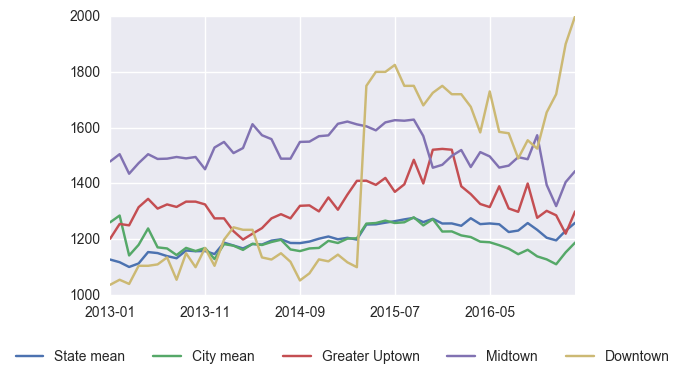

In [279]:
start_month = "2013-01"

plt = state_mean(rental_1_room, "TX", start_month).plot(label="State mean")
city_mean(rental_1_room, "Houston", start_month).plot(ax=plt, label="City mean")
# prepare_hood_data(rental_1_room, "Houston", start_month).T.plot(ax=plt)

# Filter on specific neighborhoods
prepare_hood_data(rental_1_room, "Houston", start_month).T[["Greater Uptown", "Midtown", "Downtown"]].plot(ax=plt)

# Use stack overflow answer to position plot labels below the graph
box = plt.get_position()
plt.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -.15), ncol=5)

In [147]:
# Create a transpose so we see dates as rows and hoods as columns
prepare_hood_data(rental_1_room, "Houston").T

RegionName,Alief,Sharpstown,Eldridge - West Oaks,Greater Uptown,Briarforest Area,Spring Branch West,Washington Avenue Coalition - Memorial Park,Braeswood Place,Greenway - Upper Kirby Area,Astrodome Area,Downtown,Midtown
2010-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Create a transpose so we see dates as rows and hoods as columns

Instructions

- Pick a horizon
- Subtract the (city) mean from each rows (hood)
- Sum all of the months together
- Rank things accordingly
  - You want the hoods with the greatest (positive) difference between them and the city mean
  
  
Other ideas:
- You can do this analysis (same as above) to find the fastest growing cities in the states. From there you can look at the hoods specifically.

In the future: You'll learn how to plot regression lines to compare this data and see if your results are significant. This might even give you a forecast into what will happen. With a 95% confidence I can show that SOHO is growing faster than NY as a whole.

### Homework: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb

Things I don't get:

- `Simple Linear Regression` What does the formula mean exactly?
- `Plotting the Least Squares Line` What does that help us do?
- Starting getting lost at `How Well Does the Model Fit the data?`


In [263]:
city = prepare_hood_data(rental_1_room, "Houston", start_month).T

# Get the data redy for linear regression
city["date"] = range(0, city.index.size)

In [264]:
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='date ~ Alief', data=city).fit()

# print the coefficients
lm.params

Intercept    45.821634
Alief        -0.031915
dtype: float64

In [274]:
city = prepare_hood_data(rental_1_room, "Houston", "2016-01").T
city = city.rename(columns=lambda x: x.strip().replace(' ', '_').replace('-', '_'))
city["date"] = range(0, city.index.size)

rent_growth = []

for neighborhood in city:
    lm = smf.ols(formula='date ~ {}'.format(neighborhood), data=city).fit()
    rent_growth.append((neighborhood, lm.params[neighborhood]))

In [275]:
sorted(rent_growth, key= lambda x: x[1])

[('Greenway___Upper_Kirby_Area', -0.087721938007824241),
 ('Braeswood_Place', -0.085183313245985798),
 ('Eldridge___West_Oaks', -0.082579362305820234),
 ('Astrodome_Area', -0.069450405190477515),
 ('Washington_Avenue_Coalition___Memorial_Park', -0.062678802219811702),
 ('Greater_Uptown', -0.041662328022145048),
 ('Briarforest_Area', -0.036365245089364666),
 ('Midtown', -0.034996936353131773),
 ('Spring_Branch_West', -0.028473884964422849),
 ('Alief', -0.0033124554001540754),
 ('Downtown', 0.010142740815251215),
 ('Sharpstown', 0.10265052857361651),
 ('date', 1.0000000000000004)]